In [ ]:
pip install datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("mstz/covertype", 'covertype')['train']


In [ ]:
dataset.to_csv("train.csv")

Creating CSV from Arrow format:   0%|          | 0/582 [00:00<?, ?ba/s]

187886567

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('train.csv')

# display train data
train.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,...,soil_type_id_31,soil_type_id_32,soil_type_id_33,soil_type_id_34,soil_type_id_35,soil_type_id_36,soil_type_id_37,soil_type_id_38,soil_type_id_39,cover_type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,False,False,False,False,False,False,False,False,False,4
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,False,False,False,False,False,False,False,False,False,4
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,False,False,False,False,False,False,False,False,False,1
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,False,False,False,False,False,False,False,False,False,1
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,False,False,False,False,False,False,False,False,False,4


In [ ]:
# size of data frame
train.shape

(581012, 55)

In [ ]:
# look at the data types of each feature and see if there needs to be any pre-processing
train.dtypes

elevation                             float64
aspect                                float64
slope                                 float64
horizontal_distance_to_hydrology      float64
vertical_distance_to_hydrology        float64
horizontal_distance_to_roadways       float64
hillshade_9am                         float64
hillshade_noon                        float64
hillshade_3pm                         float64
horizontal_distance_to_fire_points    float64
wilderness_area_id_0                     bool
wilderness_area_id_1                     bool
wilderness_area_id_2                     bool
wilderness_area_id_3                     bool
soil_type_id_0                           bool
soil_type_id_1                           bool
soil_type_id_2                           bool
soil_type_id_3                           bool
soil_type_id_4                           bool
soil_type_id_5                           bool
soil_type_id_6                           bool
soil_type_id_7                    

In [ ]:
train.isnull().any()

elevation                             False
aspect                                False
slope                                 False
horizontal_distance_to_hydrology      False
vertical_distance_to_hydrology        False
horizontal_distance_to_roadways       False
hillshade_9am                         False
hillshade_noon                        False
hillshade_3pm                         False
horizontal_distance_to_fire_points    False
wilderness_area_id_0                  False
wilderness_area_id_1                  False
wilderness_area_id_2                  False
wilderness_area_id_3                  False
soil_type_id_0                        False
soil_type_id_1                        False
soil_type_id_2                        False
soil_type_id_3                        False
soil_type_id_4                        False
soil_type_id_5                        False
soil_type_id_6                        False
soil_type_id_7                        False
soil_type_id_8                  

Mudando o dataset para tipo inteiro

In [ ]:
for column in train.columns:
  train[column] = train[column].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   elevation                           581012 non-null  int64
 1   aspect                              581012 non-null  int64
 2   slope                               581012 non-null  int64
 3   horizontal_distance_to_hydrology    581012 non-null  int64
 4   vertical_distance_to_hydrology      581012 non-null  int64
 5   horizontal_distance_to_roadways     581012 non-null  int64
 6   hillshade_9am                       581012 non-null  int64
 7   hillshade_noon                      581012 non-null  int64
 8   hillshade_3pm                       581012 non-null  int64
 9   horizontal_distance_to_fire_points  581012 non-null  int64
 10  wilderness_area_id_0                581012 non-null  int64
 11  wilderness_area_id_1                581012 non-null 

In [ ]:
train.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,...,soil_type_id_31,soil_type_id_32,soil_type_id_33,soil_type_id_34,soil_type_id_35,soil_type_id_36,soil_type_id_37,soil_type_id_38,soil_type_id_39,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,4
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,4
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,1
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,1
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,4


# Data Exploration

Separando em classificação numérica e binária

In [ ]:
# extract all numerical features from train
num_features = train.iloc[:,0:10]

# extract all binary features from train
cat_features = train.iloc[:, 10:-1]

In [ ]:
num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 10 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   elevation                           581012 non-null  int64
 1   aspect                              581012 non-null  int64
 2   slope                               581012 non-null  int64
 3   horizontal_distance_to_hydrology    581012 non-null  int64
 4   vertical_distance_to_hydrology      581012 non-null  int64
 5   horizontal_distance_to_roadways     581012 non-null  int64
 6   hillshade_9am                       581012 non-null  int64
 7   hillshade_noon                      581012 non-null  int64
 8   hillshade_3pm                       581012 non-null  int64
 9   horizontal_distance_to_fire_points  581012 non-null  int64
dtypes: int64(10)
memory usage: 44.3 MB


In [ ]:
cat_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 44 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   wilderness_area_id_0  581012 non-null  int64
 1   wilderness_area_id_1  581012 non-null  int64
 2   wilderness_area_id_2  581012 non-null  int64
 3   wilderness_area_id_3  581012 non-null  int64
 4   soil_type_id_0        581012 non-null  int64
 5   soil_type_id_1        581012 non-null  int64
 6   soil_type_id_2        581012 non-null  int64
 7   soil_type_id_3        581012 non-null  int64
 8   soil_type_id_4        581012 non-null  int64
 9   soil_type_id_5        581012 non-null  int64
 10  soil_type_id_6        581012 non-null  int64
 11  soil_type_id_7        581012 non-null  int64
 12  soil_type_id_8        581012 non-null  int64
 13  soil_type_id_9        581012 non-null  int64
 14  soil_type_id_10       581012 non-null  int64
 15  soil_type_id_11       581012 non-n

In [ ]:
num_features.describe()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [ ]:
cat_features.describe()

,wilderness_area_id_0,wilderness_area_id_1,wilderness_area_id_2,wilderness_area_id_3,soil_type_id_0,soil_type_id_1,soil_type_id_2,soil_type_id_3,soil_type_id_4,soil_type_id_5,...,soil_type_id_30,soil_type_id_31,soil_type_id_32,soil_type_id_33,soil_type_id_34,soil_type_id_35,soil_type_id_36,soil_type_id_37,soil_type_id_38,soil_type_id_39
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Feature Skew

In [ ]:
skew = train.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])
print(skew)

elevation                              -0.817596
aspect                                  0.402628
slope                                   0.789273
horizontal_distance_to_hydrology        1.140437
vertical_distance_to_hydrology          1.790250
horizontal_distance_to_roadways         0.713679
hillshade_9am                          -1.181147
hillshade_noon                         -1.063056
hillshade_3pm                          -0.277053
horizontal_distance_to_fire_points      1.288644
wilderness_area_id_0                    0.205618
wilderness_area_id_1                    4.061595
wilderness_area_id_2                    0.257822
wilderness_area_id_3                    3.575561
soil_type_id_0                         13.736670
soil_type_id_1                          8.615358
soil_type_id_2                         10.838630
soil_type_id_3                          6.625176
soil_type_id_4                         18.995243
soil_type_id_5                          9.240061
soil_type_id_6      

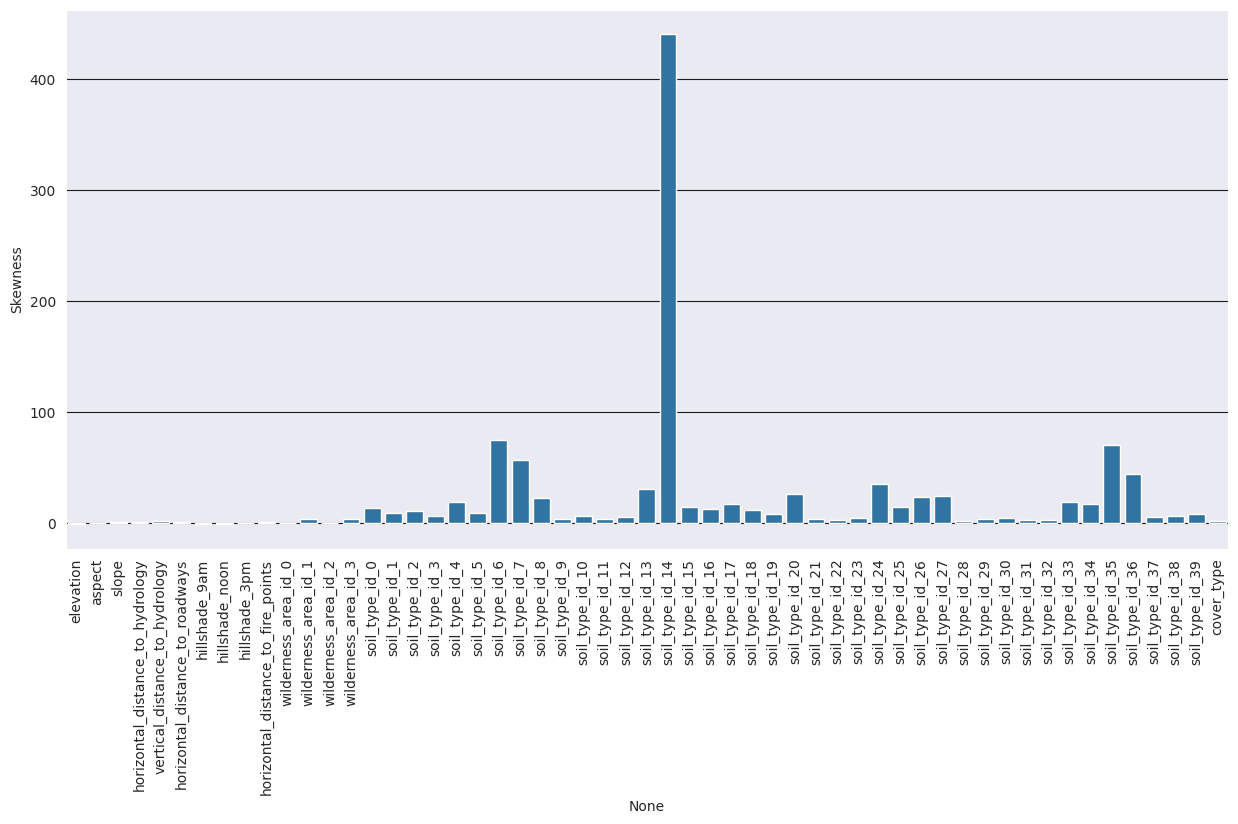

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index, y='Skewness', data=skew_df)
var = plt.xticks(rotation=90)

soil_type_id_14 tem a maior assimetria

In [ ]:
train.groupby('cover_type').size() # Checar o que acontece quando difere assim

cover_type
0    211840
1    283301
2     35754
3      2747
4      9493
5     17367
6     20510
dtype: int64

#Feature Visualization

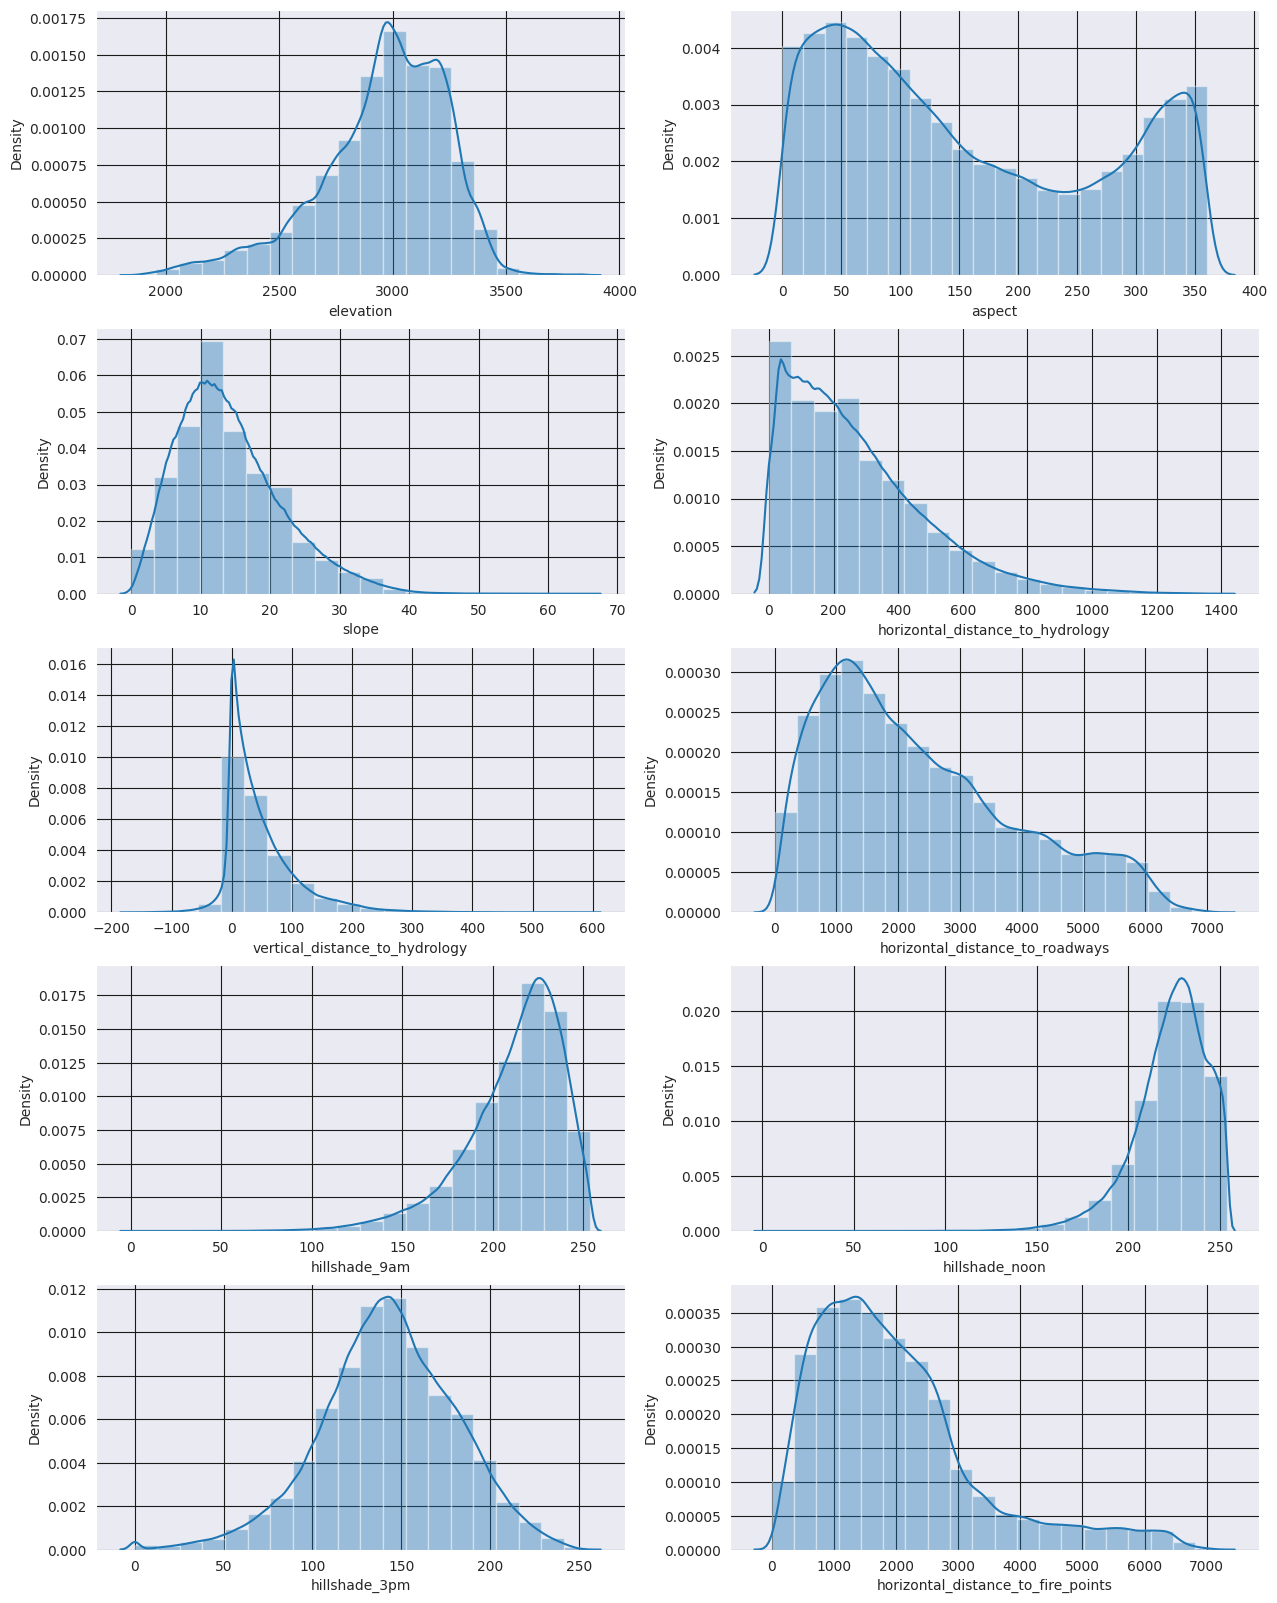

In [ ]:
fig, ax = plt.subplots(5,2, figsize=(15,20))

sns.distplot(train.elevation, bins=20, ax=ax[0,0])
sns.distplot(train.aspect, bins=20, ax=ax[0,1])
sns.distplot(train.slope, bins = 20, ax=ax[1,0])
sns.distplot(train.horizontal_distance_to_hydrology, bins = 20, ax=ax[1,1])
sns.distplot(train.vertical_distance_to_hydrology, bins = 20, ax=ax[2,0])
sns.distplot(train.horizontal_distance_to_roadways, bins = 20, ax=ax[2,1])
sns.distplot(train.hillshade_9am, bins = 20, ax=ax[3,0])
sns.distplot(train.hillshade_noon, bins = 20, ax=ax[3,1])
sns.distplot(train.hillshade_3pm, bins = 20, ax=ax[4,0])
sns.distplot(train.horizontal_distance_to_fire_points, bins = 20, ax=ax[4,1])
plt.show()

* Nenhuma feature numérica é normalizada

#Feature Distribution

Agora traçaremos como Wilderness_Area e Soil_Type são distribuídos.

##Wilderness_Area

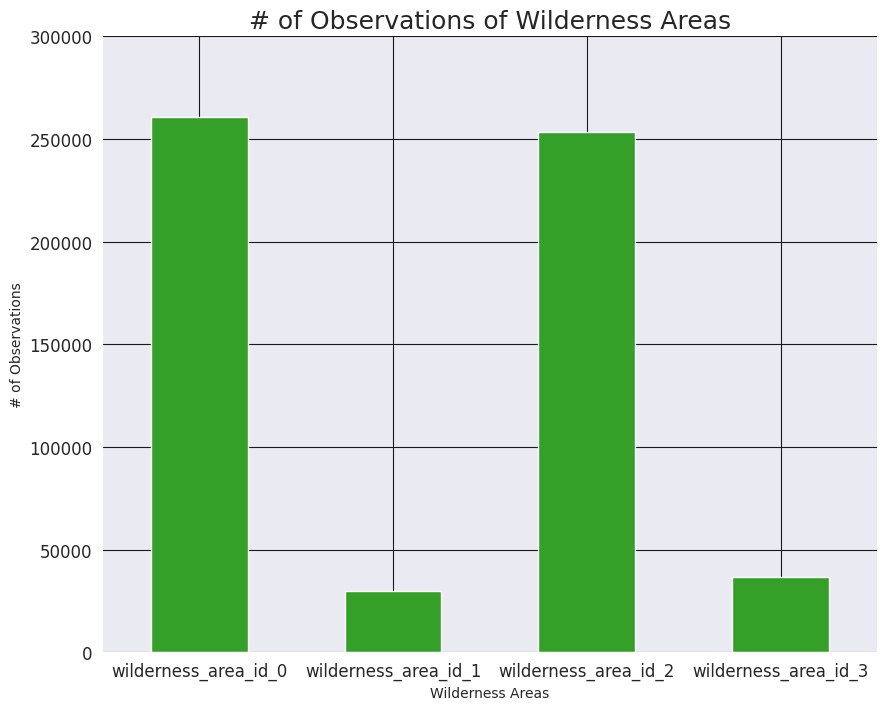

In [ ]:
# split cat_features
wild_data, soil_data = cat_features.iloc[:,:4], cat_features.iloc[:,4:]

# plot bg
sns.set_style("darkgrid", {'grid.color':'.1'})
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]

# use seaborn, pass colors to palette
palette = sns.color_palette(flatui)

# sum the data, plot bar
wild_data.sum().plot(kind='bar', figsize=(10,8), color='#34a028')
plt.title('# of Observations of Wilderness Areas', size=18)
plt.xlabel('Wilderness Areas')
plt.ylabel('# of Observations')
plt.ylim([0,300000])
plt.xticks(rotation='horizontal', size=12)
plt.yticks(size=12)

sns.despine()
plt.show()

wilderness_area0 e wilderness_area2 tem mais presença.
wilderness_area1 tem menos.

In [ ]:
# total count of each wilderness area
wild_data.sum()

wilderness_area_id_0    260796
wilderness_area_id_1     29884
wilderness_area_id_2    253364
wilderness_area_id_3     36968
dtype: int64

##Soil_Type

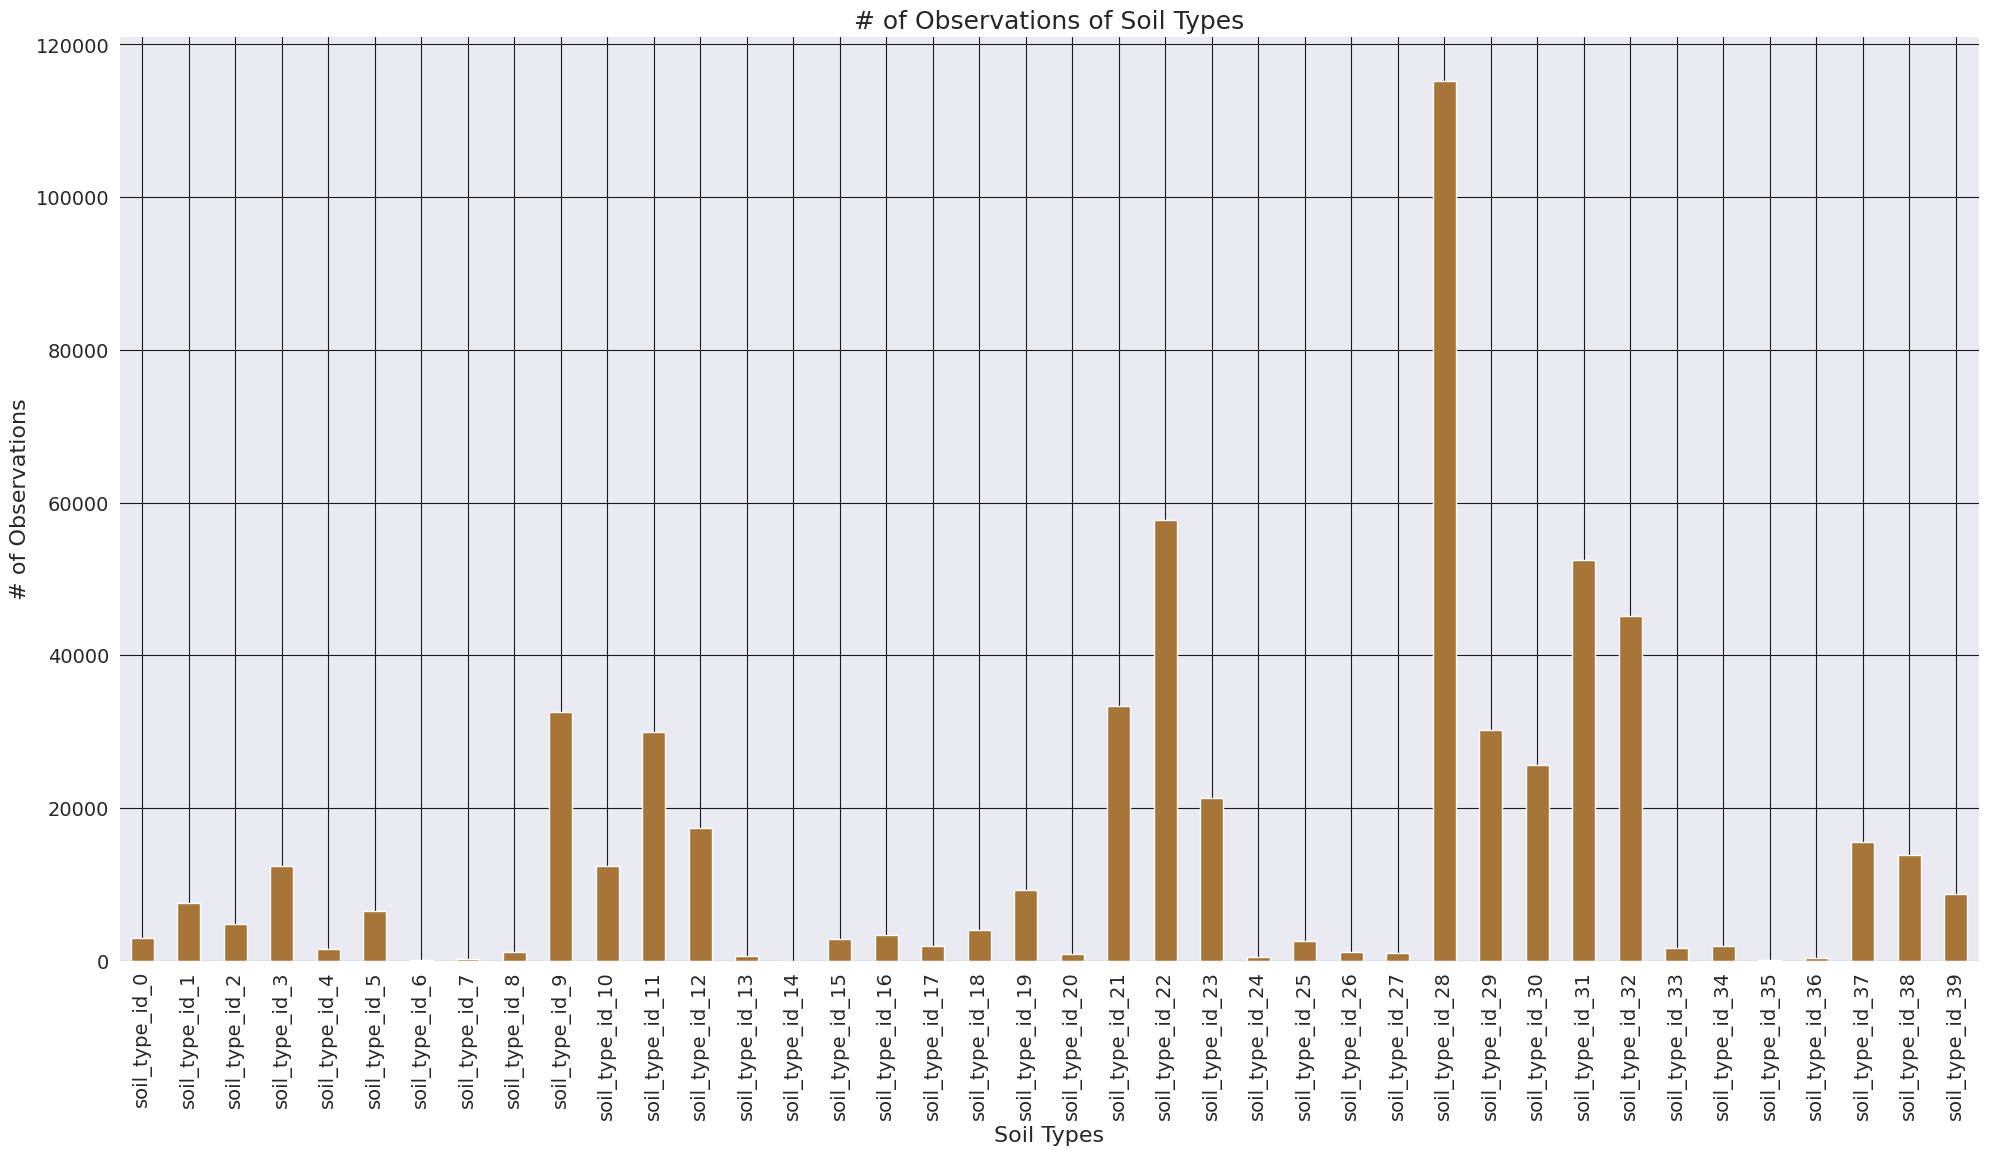

In [ ]:
# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# sum data, plot bar
soil_data.sum().plot(kind='bar', figsize=(24,12), color='#a87539')
plt.title('# of Observations of Soil Types', size=18)
plt.xlabel('Soil Types', size=16)
plt.ylabel('# of Observations', size=16)
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)

sns.despine()
plt.show()

soil_type_id_28 tem 19% de presença, o que tem mais observações.
soil_type_id_28 também tem o valor menos distorcido dos Soil Types, como analisado em Feature Skew.
soil_type_id_6, soil_type_id_14 e soil_type_id_35 são os menores e os com mais distorções.

In [ ]:
# statistical description of highest observation of soil type
soil_data.loc[:,'soil_type_id_28'].describe()

count    581012.000000
mean          0.198356
std           0.398762
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: soil_type_id_28, dtype: float64

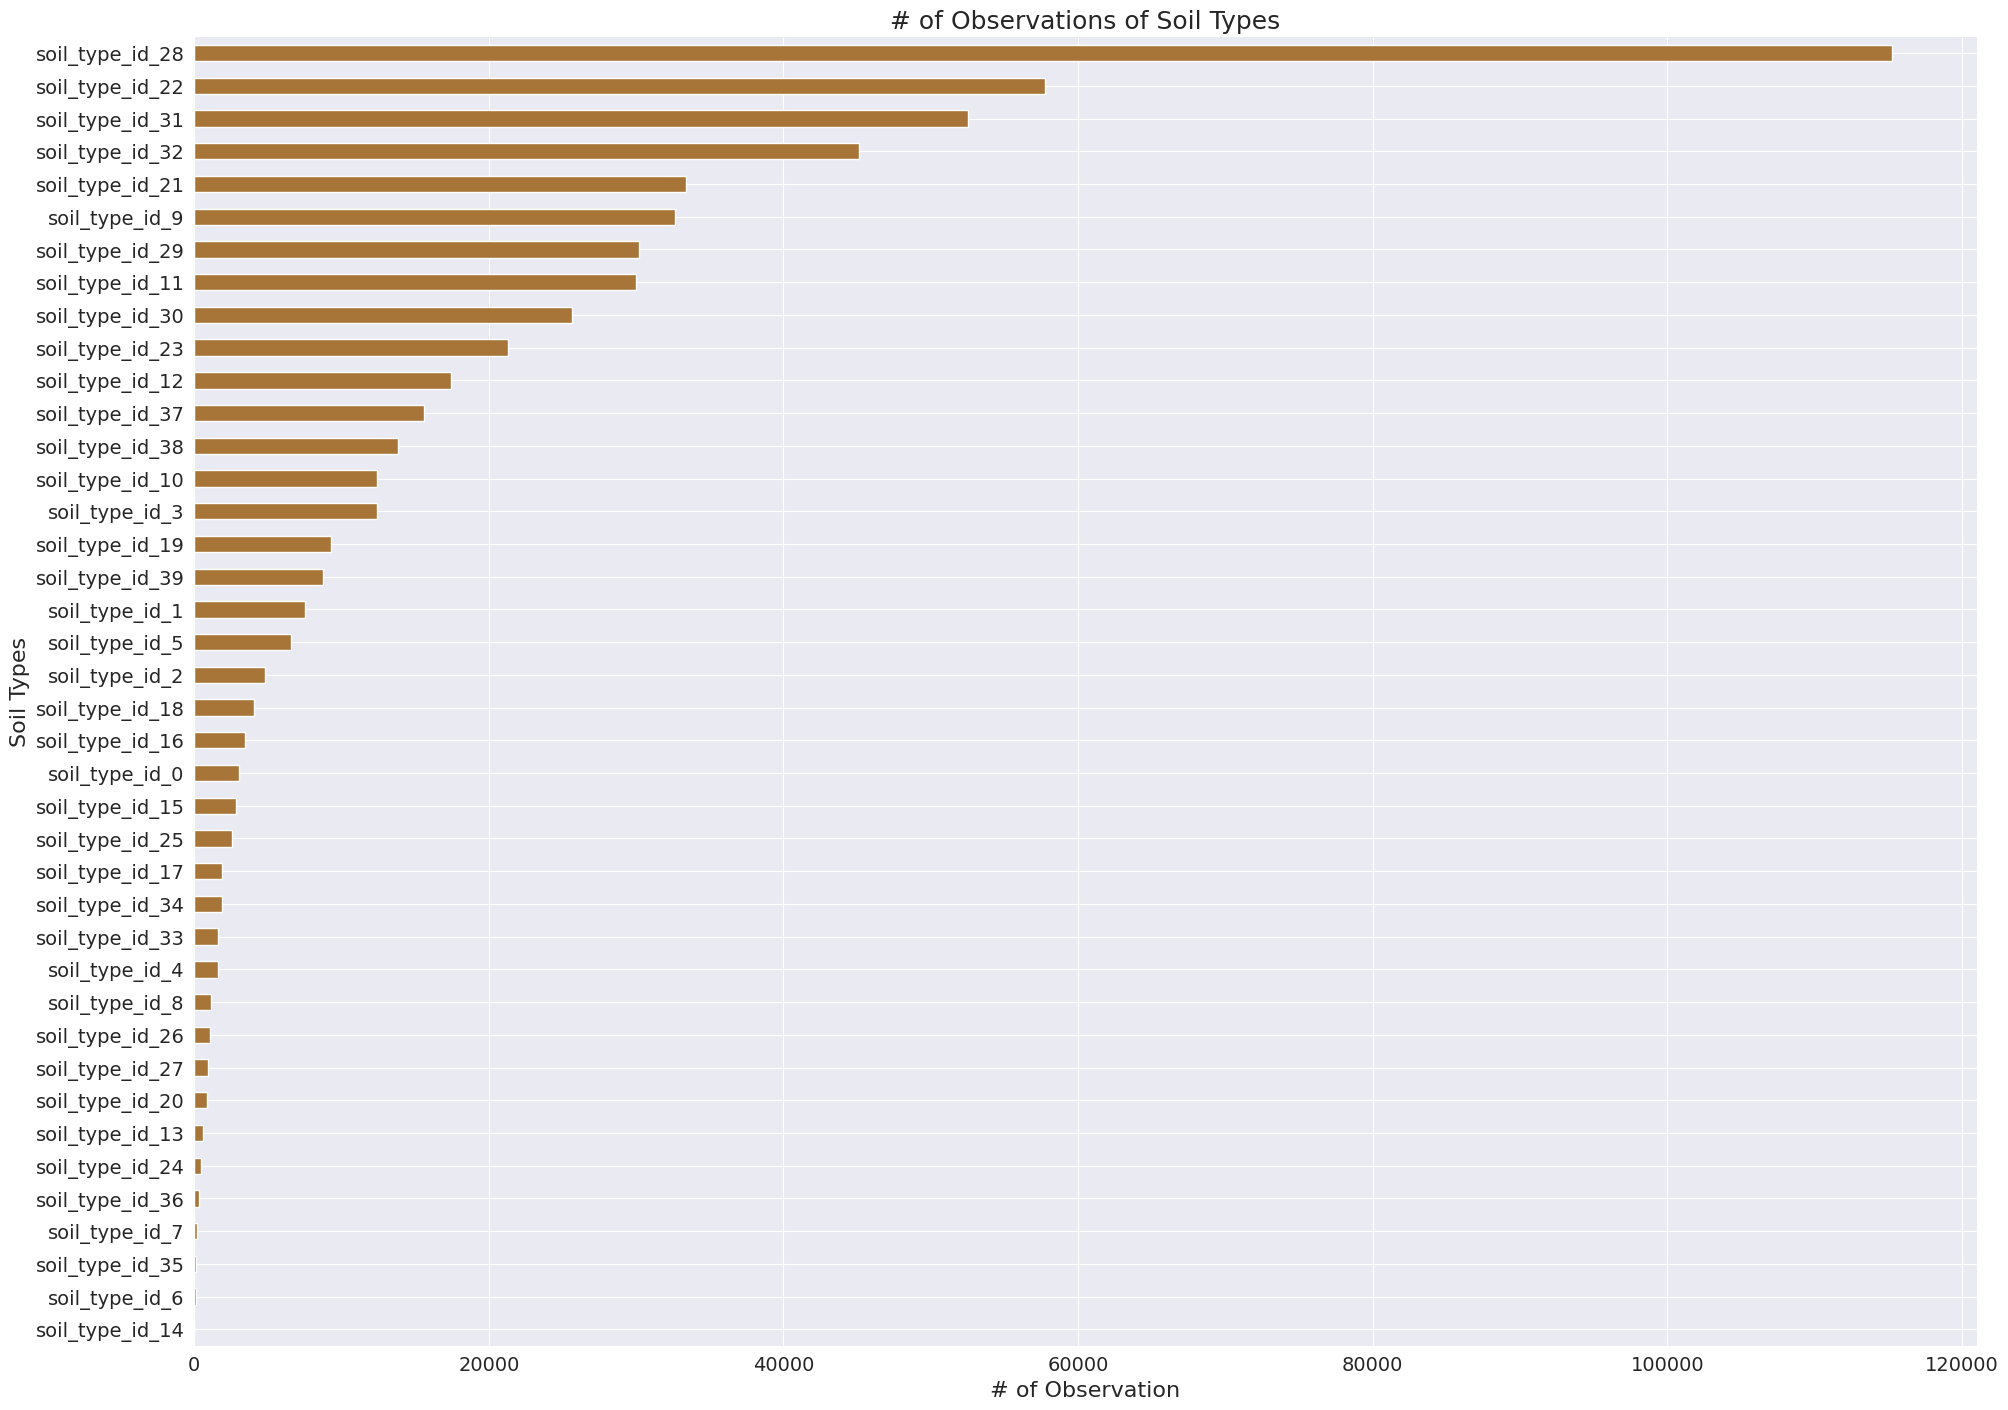

In [ ]:
# plot bg
sns.set_style("darkgrid", {'grid_color': '.1'})

# sum soil data, pass it as a series
soil_sum = pd.Series(soil_data.sum())
soil_sum.sort_values(ascending=False, inplace=True)

# plot bar
soil_sum.plot(kind='barh', figsize=(23,17), color='#a87539')
plt.gca().invert_yaxis()
plt.title('# of Observations of Soil Types', size=18)
plt.xlabel('# of Observation', size=16)
plt.ylabel('Soil Types', size=16)
plt.xticks(rotation='horizontal',size=14)
plt.yticks(size=14)

sns.despine()
plt.show()

#Feature Comparison

A seguir, compararemos cada recurso em nossos dados com a variável de destino.

## Numerical Features Inferences

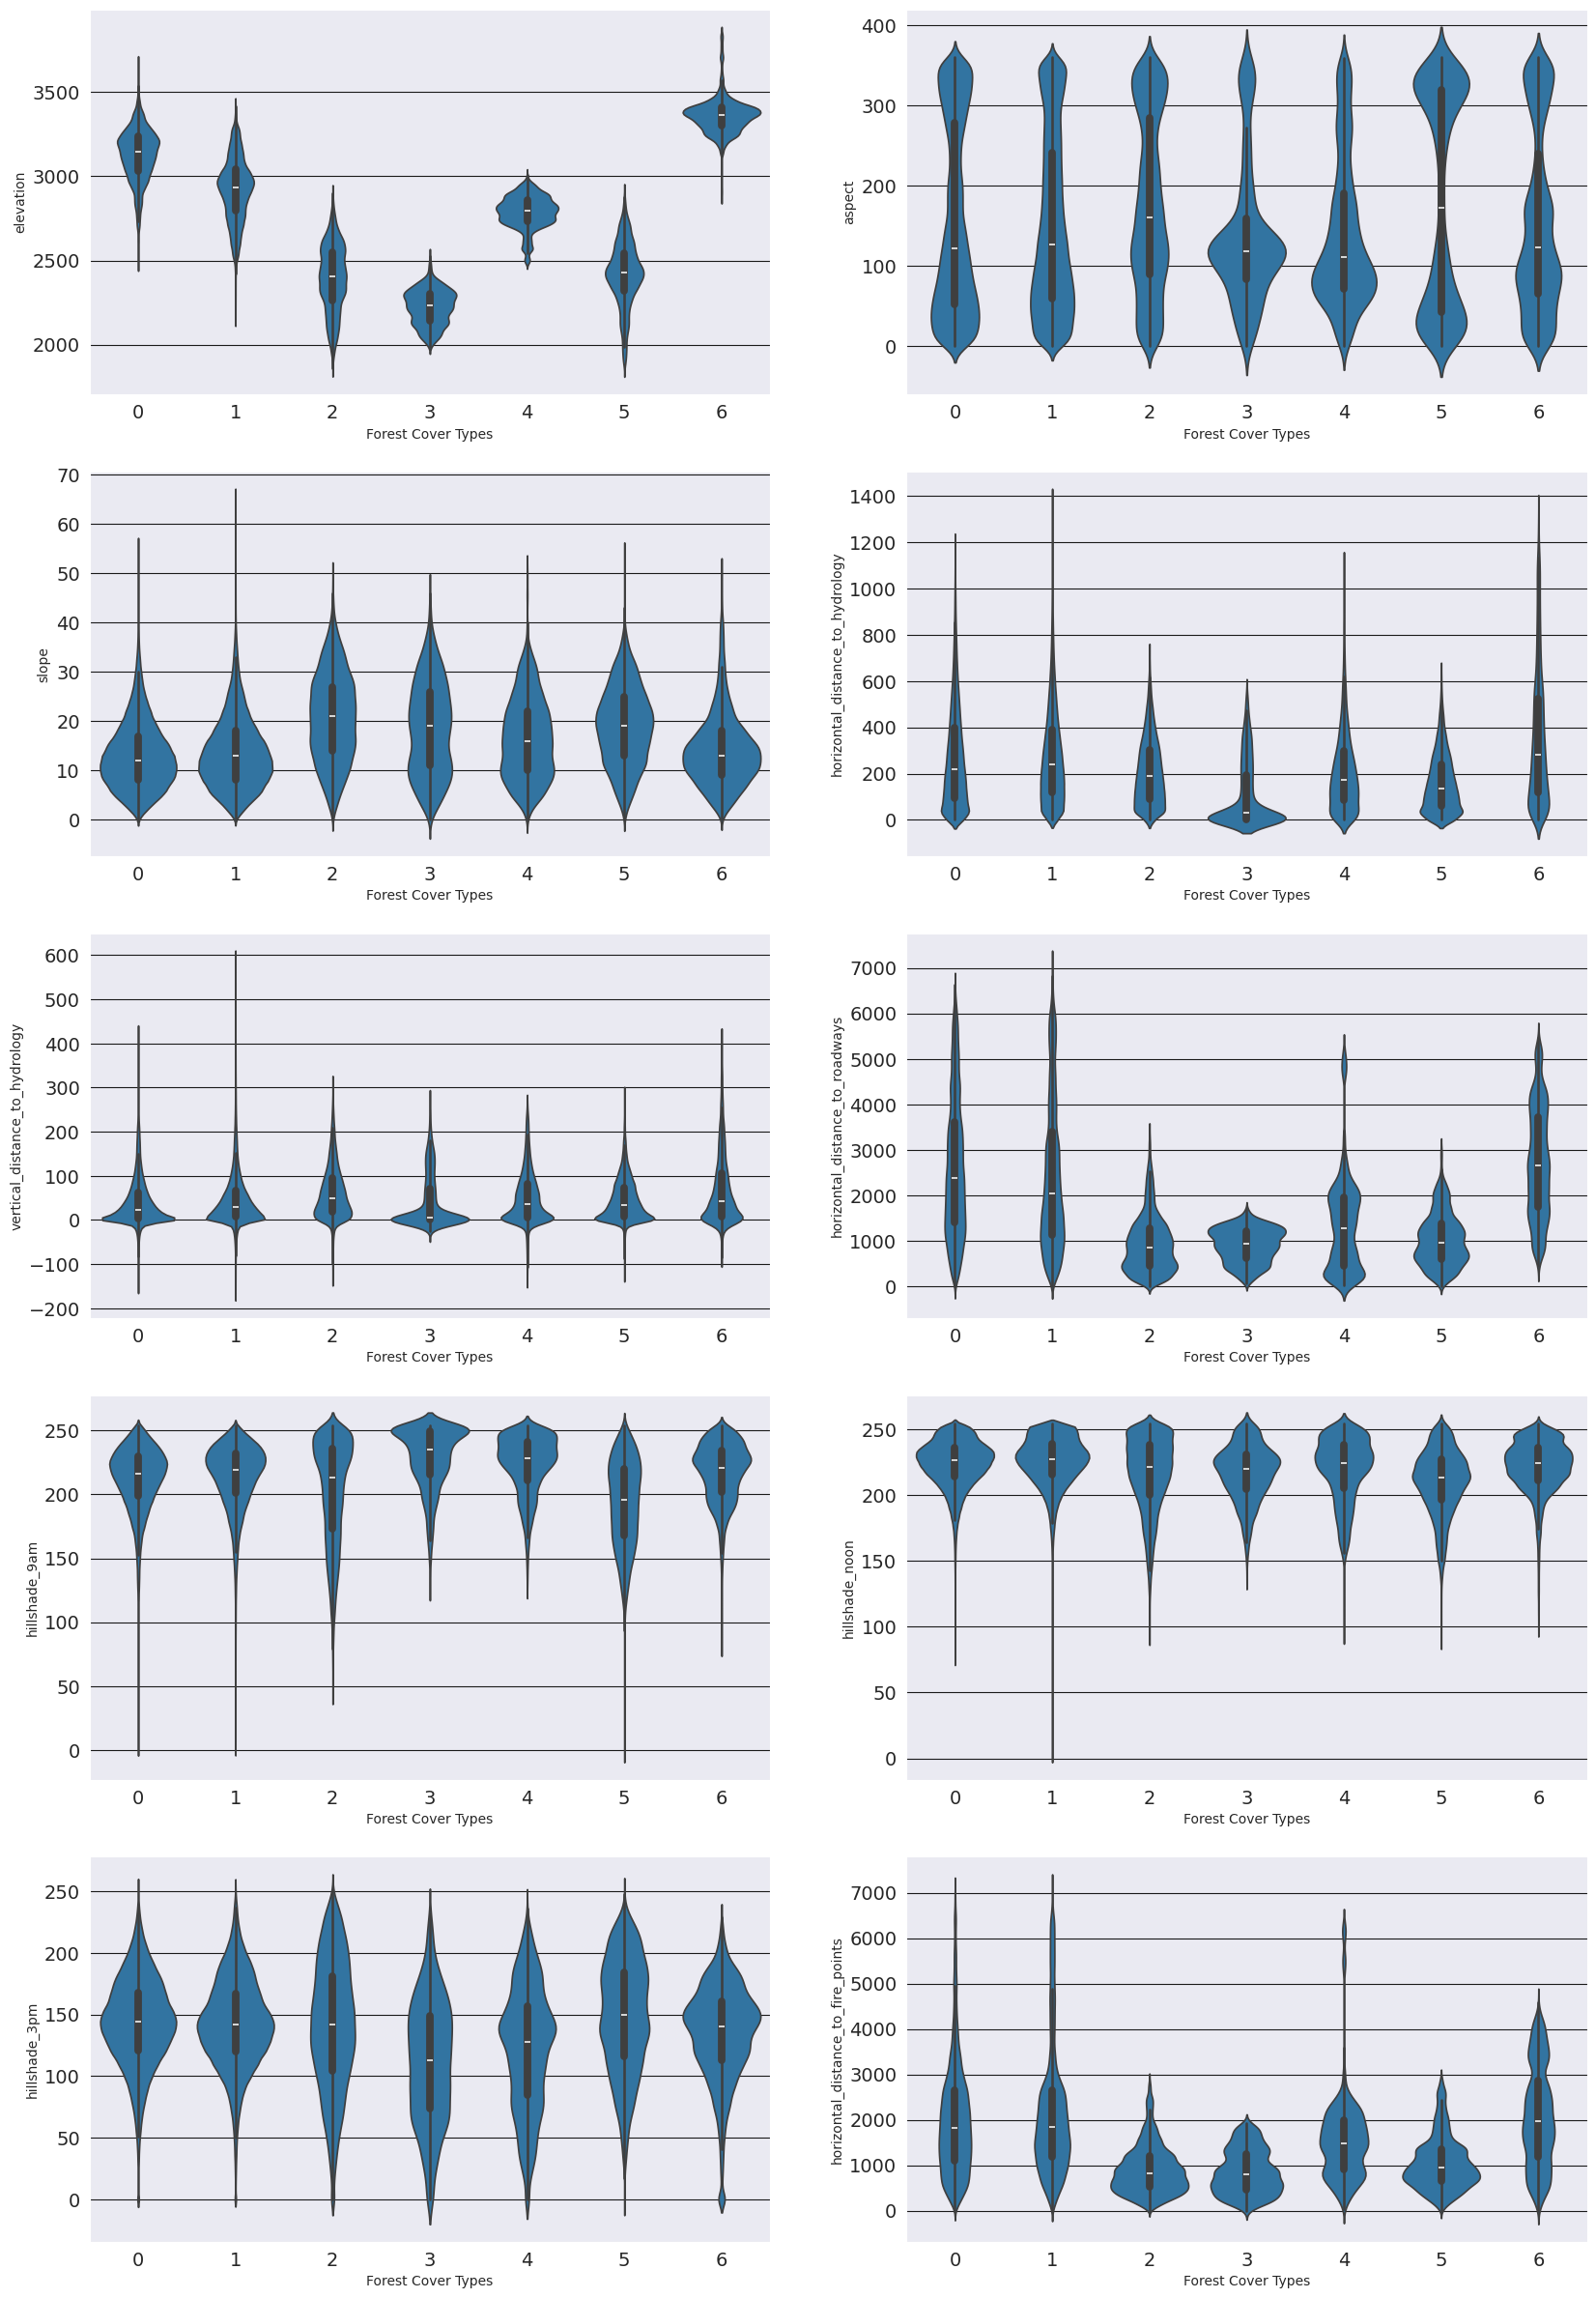

In [ ]:
# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# set target variable
target = train['cover_type']

# features to be compared with target variable
features = num_features.columns

plt.figure(figsize = [20,30])

# loop for violin plot
for i in range(0, len(features)):
    plt.subplot(5,2,1+i)
    sns.violinplot(data=num_features, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types')
    plt.ylabel(features[i])

plt.show()

*   cover_type3 tem a maior parte entre 2000m e 2500m;
*   aspect e hillshade_3pm tem distribuições normais;
*   horizontal_distance_to_hydrology, vertical_distance_to_hydrology, hillshade_9am, hillshade_Noon apresentam distribuição distorcida onde os dois últimos são negativamente.


## Distribution of Wilderness_Area by Cover_Type Inferences

In [ ]:
cols = train.columns
r,c = train.shape

# Create a new dataframe with r rows, one column for each encoded category[Wilderness_Area(1-4),Soil_type[1-40], and target in the end
new_train = pd.DataFrame(index= np.arange(0,r), columns=['wilderness_area_id_', 'soil_type_id_', 'cover_type'])

In [ ]:
# make an entry in data for each r for category_id, target_value
for i in range(0,r):
    p = 0;
    q = 0;
    # wilderness_area range
    for j in range(10,14):
        if (train.iloc[i,j] == 1):
            p = j-10
            break
    # soil_type range
    for k in range(14,54):
        if (train.iloc[i,k] == 1):
            q = k-14
            break
    # make entry in data for each r
    new_train.iloc[i] = [p,q,train.iloc[i, c-1]]

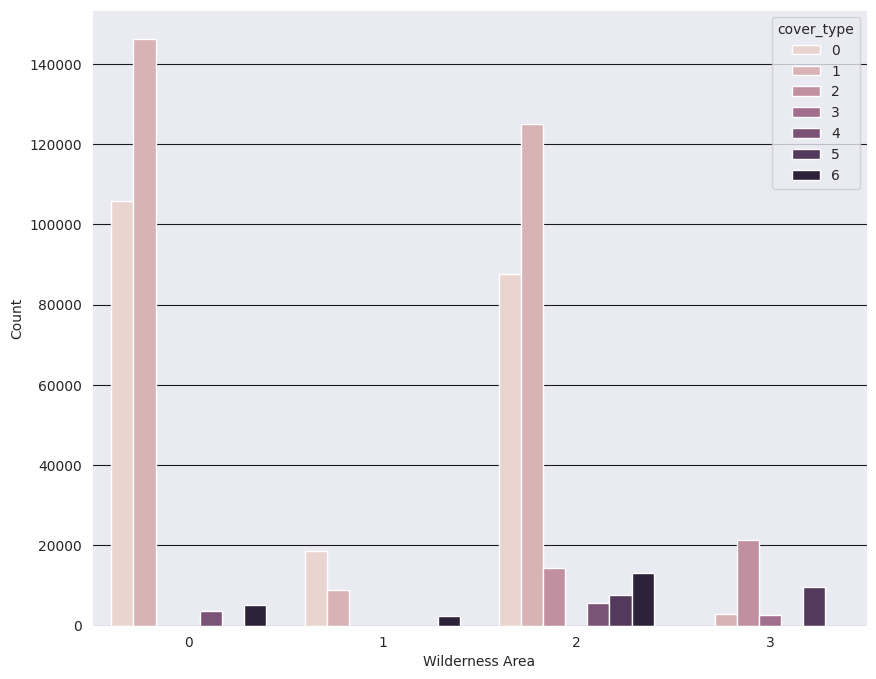

In [ ]:
# plot wilderness_area by cover_type
plt.figure(figsize = [10,8])
sns.countplot(x='wilderness_area_id_', hue='cover_type', data=new_train)
plt.xlabel('Wilderness Area')
plt.ylabel('Count')
plt.show()

* cover_type[0,1,4] aparecem mais em wilderness_area_id_[0,2]
* cover_type[3] aparece em wilderness_area_id_[4]
* cover_type[2,5] aparecem mais em wilderness_area_id_[2,3]
* cover_type[6] aparece: mais em wilderness_area_id_[0,1,2]


## Understanding Cover_Type Distribution Among Wilderness_Areas

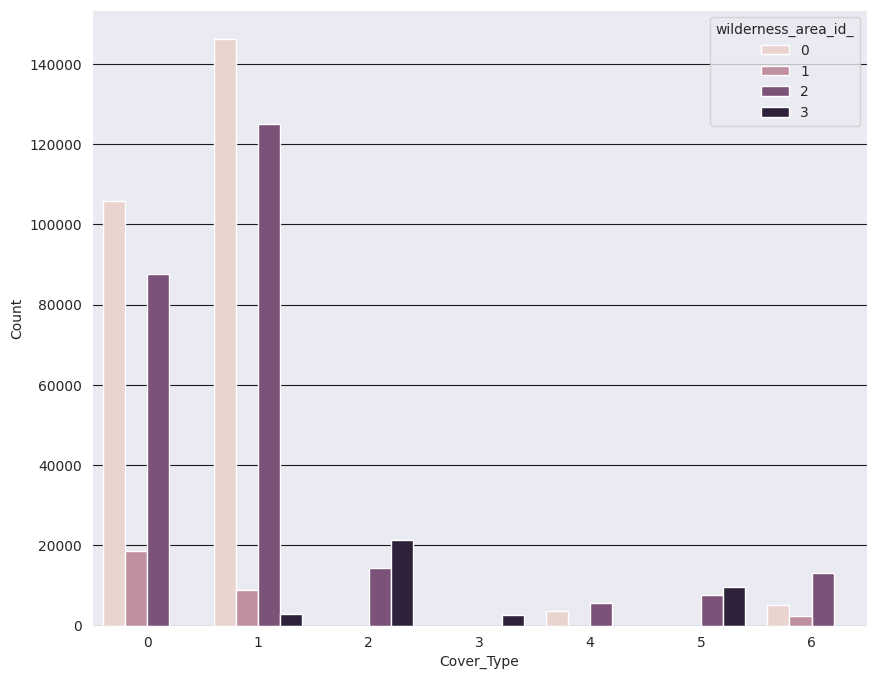

In [ ]:
# plot cover_type by wilderness_area
plt.figure(figsize = [10,8])
sns.countplot(x='cover_type', hue='wilderness_area_id_', data=new_train)
plt.xlabel('Cover_Type')
plt.ylabel('Count')
plt.show()

* cover_type[0,1,2] são mais encontrado em wilderness_area[0,1,6]
* cover_type[2] pode ser encontrado também em wilderness_area[2,4,5]
* cover_type[3] pode ser encontrado em wilderness_area[1,2,3,5]

##Distribution of Cover Type by Soil Type

In [ ]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

In [ ]:
st_by_ct = pd.crosstab(new_train['cover_type'], new_train['soil_type_id_'])

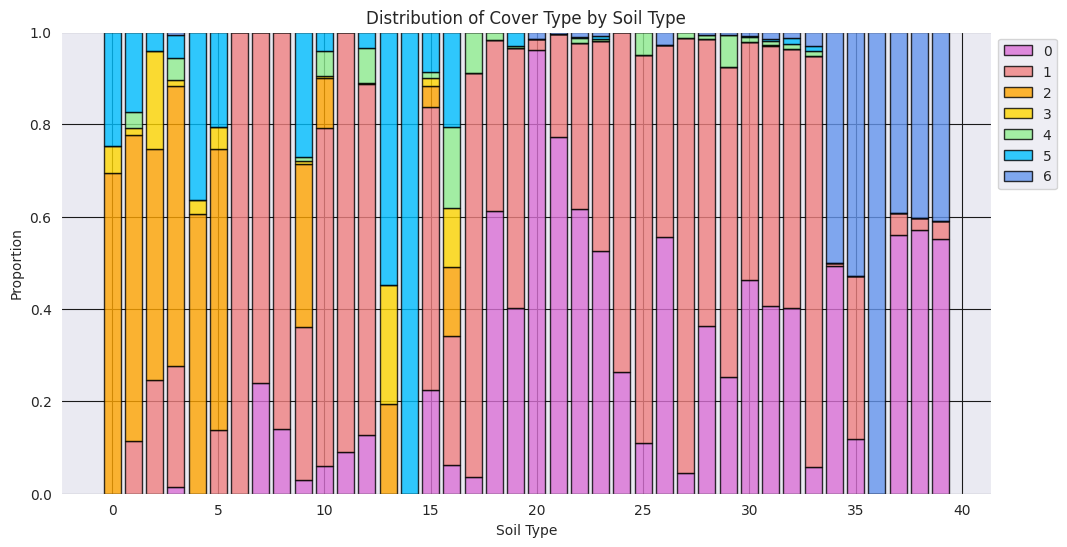

In [ ]:
st_by_ct_props = st_by_ct/np.sum(st_by_ct)
bb = np.cumsum(st_by_ct_props) - st_by_ct_props

plt.figure(figsize = [12,6])
for row_indx in range(len(st_by_ct_props)):
    plt.bar(st_by_ct_props.columns.values,
            st_by_ct_props.iloc[row_indx].values,
            bottom = bb.iloc[row_indx].values,
            color = palette[row_indx],
            alpha = 0.8,
            edgecolor = 'black',
            label = st_by_ct_props.index[row_indx]
            )
plt.title('Distribution of Cover Type by Soil Type')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.show()

* soil_type3 é o único tipo de solo que tem a presença de todos os tipos de cobertura
* Nenhum tipo de solo tem pouca ou total ausência de tipo de cobertura
* O cover_type1 é o que mais aparece em tipos de solo diferentes
* O cover_type3 é o que menos aparece em tipos de solo diferentes

# Feature Correlation

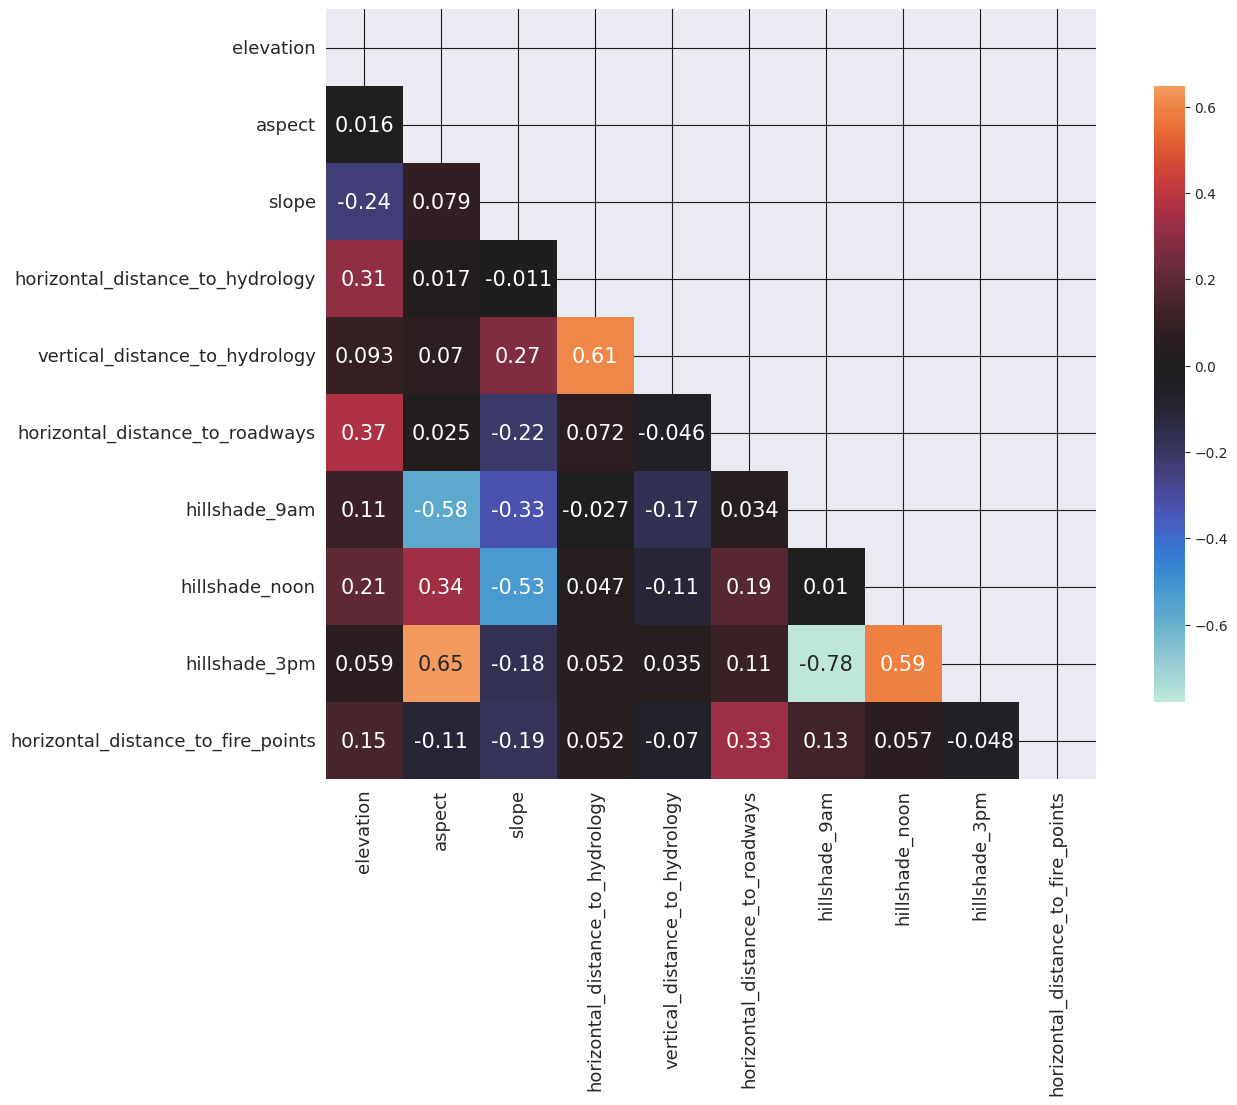

In [ ]:
plt.subplots(figsize=(15,10))

# compute correlation matrix
num_features_corr = num_features.corr()

# generate mask for upper triangle
mask = np.zeros_like(num_features_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# generate heatmap masking the upper triangle and shrink the cbar
sns.heatmap(num_features_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})
plt.xticks(size=13)
plt.yticks(size=13)

plt.show()

* hillshade_3pm e hillshade_9am mostram a correlação mais negativa.
* hillshade_3pm e aspect mostram a correlação mais positiva.
* hillshade_3pm e aspect também tem a distribuição mais normalizada.
* hillshade_noon e hillshade_9am mostram ter quase nenhuma correlação.

#Identificando Outliers

In [ ]:
Q1 = .quantile(0.25)
Q3 = num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

elevation                              354.0
aspect                                 202.0
slope                                    9.0
horizontal_distance_to_hydrology       276.0
vertical_distance_to_hydrology          62.0
horizontal_distance_to_roadways       2222.0
hillshade_9am                           33.0
hillshade_noon                          24.0
hillshade_3pm                           49.0
horizontal_distance_to_fire_points    1526.0
dtype: float64


In [ ]:
print((num_features < (Q1 - 1.5 * IQR)) | (num_features > (Q3 + 1.5 * IQR)))

        elevation  aspect  slope  horizontal_distance_to_hydrology  \
0           False   False  False                             False   
1           False   False  False                             False   
2           False   False  False                             False   
3           False   False  False                             False   
4           False   False  False                             False   
...           ...     ...    ...                               ...   
581007      False   False  False                             False   
581008      False   False  False                             False   
581009      False   False  False                             False   
581010      False   False  False                             False   
581011      False   False  False                             False   

        vertical_distance_to_hydrology  horizontal_distance_to_roadways  \
0                                False                            False   
1        

In [ ]:
outliers = num_features[((num_features < (Q1 - 1.5 * IQR)) |(num_features > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.shape

(108339, 10)

In [ ]:
num_features.shape

(581012, 10)

Ou seja, 18,6% de outliers

### Removendo outliers

In [ ]:
train_filtered = train[~((num_features < (Q1 - 1.5 * IQR)) |(num_features > (Q3 + 1.5 * IQR))).any(axis=1)]
train_filtered.shape

(472673, 55)

In [ ]:
skew = train_filtered.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])
print(skew)

elevation                             -0.559010
aspect                                 0.442915
slope                                  0.361139
horizontal_distance_to_hydrology       0.743961
vertical_distance_to_hydrology         0.869576
horizontal_distance_to_roadways        0.721241
hillshade_9am                         -0.663648
hillshade_noon                        -0.460913
hillshade_3pm                         -0.109488
horizontal_distance_to_fire_points     0.653533
wilderness_area_id_0                   0.177832
wilderness_area_id_1                   3.961177
wilderness_area_id_2                   0.178560
wilderness_area_id_3                   5.053880
soil_type_id_0                        27.851565
soil_type_id_1                         8.361383
soil_type_id_2                        13.348291
soil_type_id_3                         6.621175
soil_type_id_4                        32.149201
soil_type_id_5                         9.616724
soil_type_id_6                        83

In [ ]:
train_filtered.describe()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,...,soil_type_id_31,soil_type_id_32,soil_type_id_33,soil_type_id_34,soil_type_id_35,soil_type_id_36,soil_type_id_37,soil_type_id_38,soil_type_id_39,cover_type
count,472673.000000,472673.000000,472673.000000,472673.000000,472673.000000,472673.000000,472673.000000,472673.000000,472673.000000,472673.000000,...,472673.000000,472673.000000,472673.000000,472673.000000,472673.000000,472673.000000,472673.000000,472673.000000,472673.000000,472673.000000
mean,2983.488492,153.561466,12.863567,244.003501,35.110829,2362.883361,214.996539,225.596918,142.788027,1823.138121,...,0.102403,0.070920,0.001991,0.003542,0.000104,0.000565,0.029382,0.022876,0.010584,0.975313
std,243.145428,110.715266,6.084861,178.963438,39.872273,1538.177624,22.046152,16.556674,33.416469,1009.913333,...,0.303177,0.256692,0.044574,0.059406,0.010181,0.023760,0.168875,0.149509,0.102335,1.348780
min,2278.000000,0.000000,0.000000,0.000000,-86.000000,0.000000,149.000000,177.000000,46.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2835.000000,58.000000,8.000000,95.000000,5.000000,1149.000000,201.000000,215.000000,120.000000,1044.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3011.000000,126.000000,12.000000,212.000000,25.000000,2012.000000,219.000000,227.000000,143.000000,1704.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3170.000000,251.000000,17.000000,360.000000,57.000000,3305.000000,232.000000,238.000000,166.000000,2448.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3647.000000,360.000000,31.000000,797.000000,162.000000,6661.000000,254.000000,254.000000,227.000000,4839.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


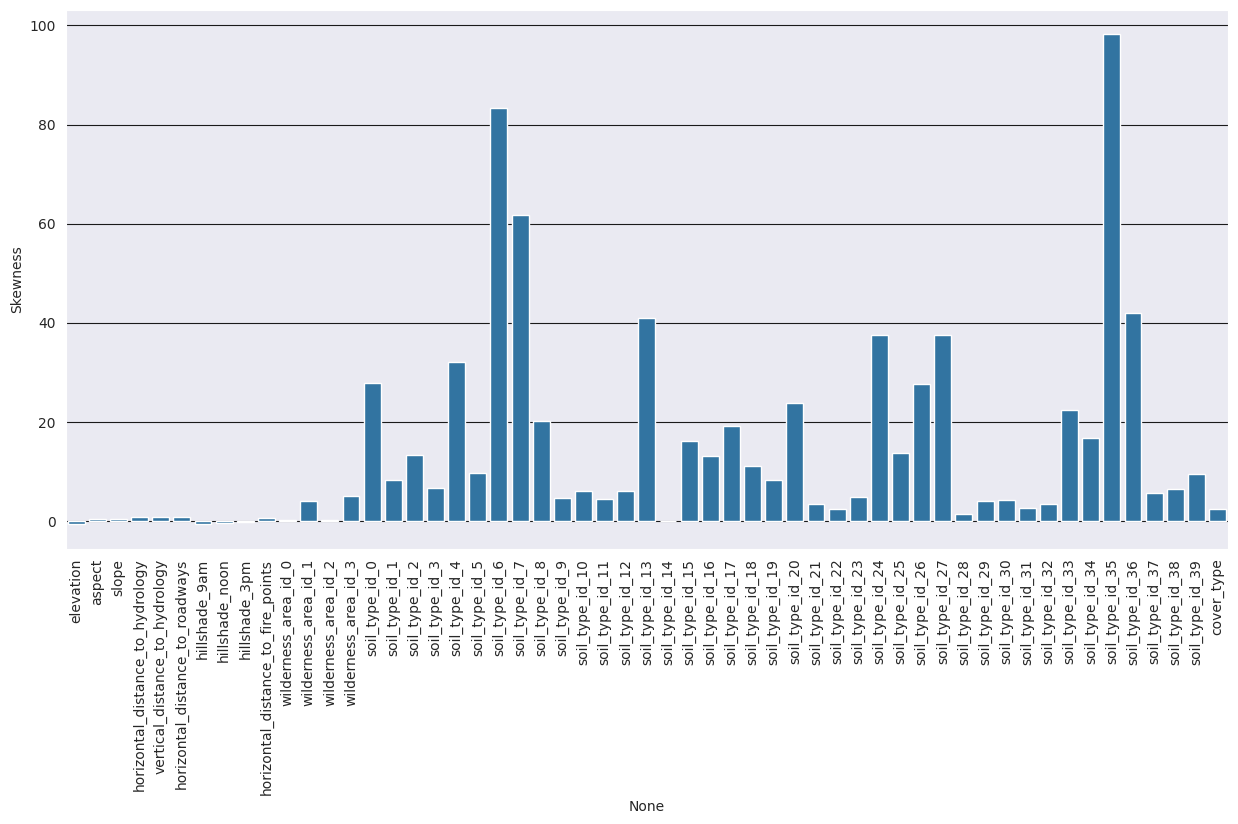

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index, y='Skewness', data=skew_df)
var = plt.xticks(rotation=90)

In [ ]:
train_filtered.groupby('cover_type').size()

cover_type
0    183211
1    232685
2     20725
3       760
4      7684
5     11795
6     15813
dtype: int64

In [ ]:
# extract all numerical features from train
num_features_filtered = train_filtered.iloc[:,0:10]

# extract all binary features from train
cat_features_filtered = train_filtered.iloc[:, 10:-1]

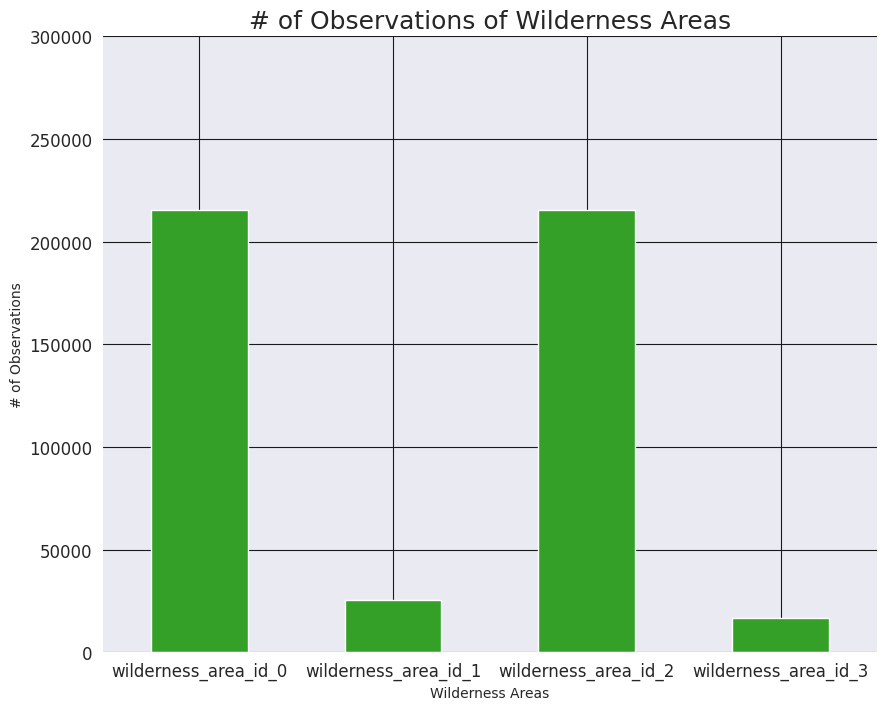

In [ ]:
# split cat_features_filtered
wild_data, soil_data = cat_features_filtered.iloc[:,:4], cat_features_filtered.iloc[:,4:]

# plot bg
sns.set_style("darkgrid", {'grid.color':'.1'})
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]

# use seaborn, pass colors to palette
palette = sns.color_palette(flatui)

# sum the data, plot bar
wild_data.sum().plot(kind='bar', figsize=(10,8), color='#34a028')
plt.title('# of Observations of Wilderness Areas', size=18)
plt.xlabel('Wilderness Areas')
plt.ylabel('# of Observations')
plt.ylim([0,300000])
plt.xticks(rotation='horizontal', size=12)
plt.yticks(size=12)

sns.despine()
plt.show()

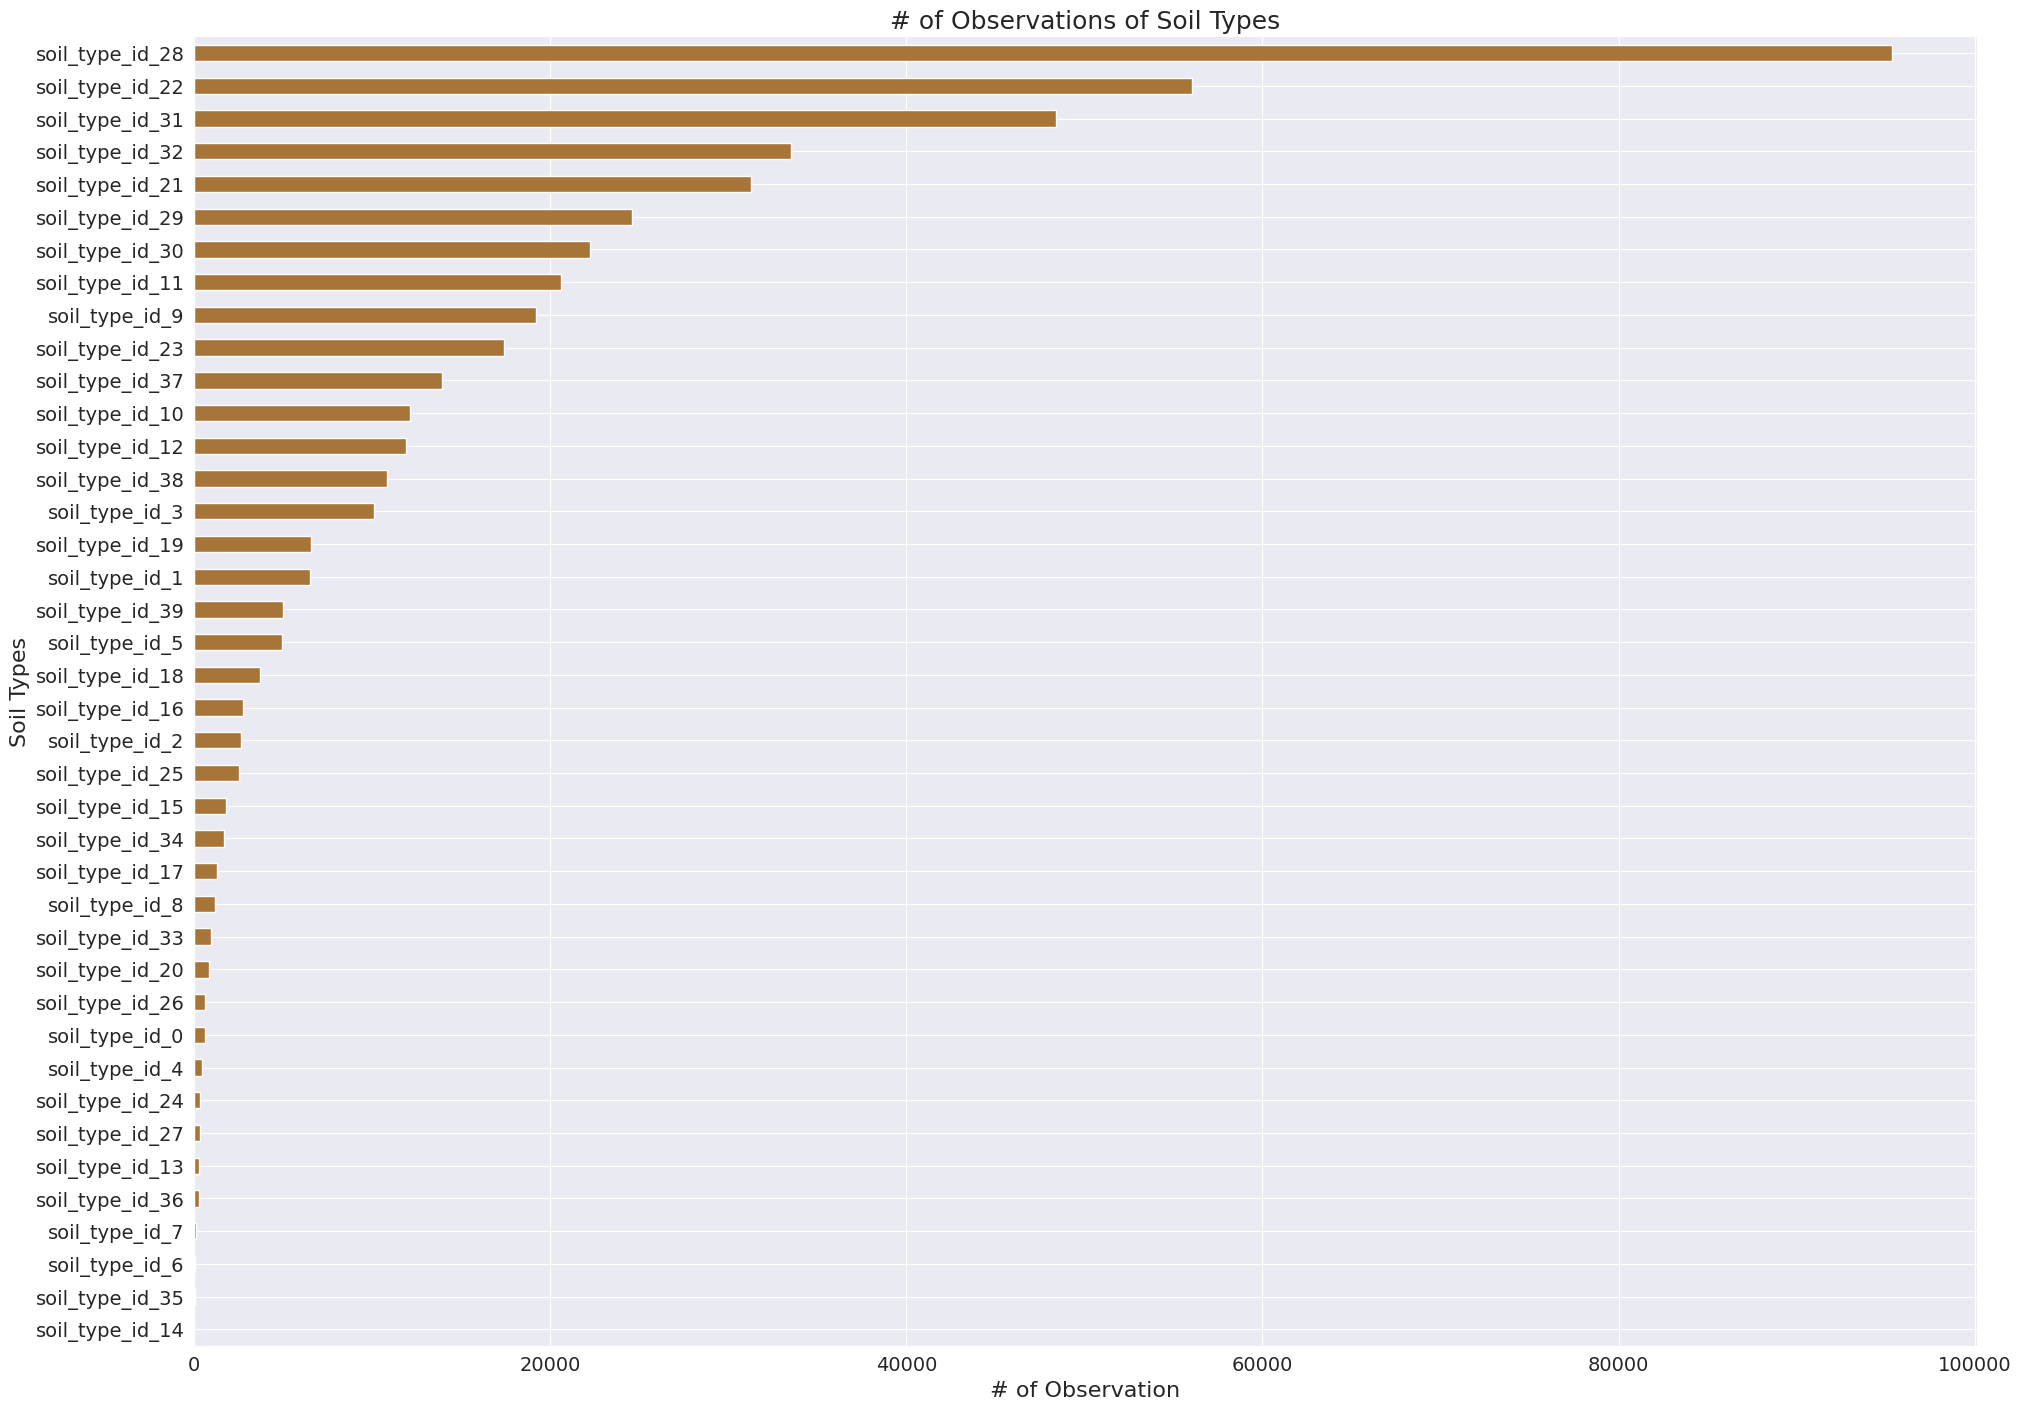

In [ ]:
# plot bg
sns.set_style("darkgrid", {'grid_color': '.1'})

# sum soil data, pass it as a series
soil_sum = pd.Series(soil_data.sum())
soil_sum.sort_values(ascending=False, inplace=True)

# plot bar
soil_sum.plot(kind='barh', figsize=(23,17), color='#a87539')
plt.gca().invert_yaxis()
plt.title('# of Observations of Soil Types', size=18)
plt.xlabel('# of Observation', size=16)
plt.ylabel('Soil Types', size=16)
plt.xticks(rotation='horizontal',size=14)
plt.yticks(size=14)

sns.despine()
plt.show()

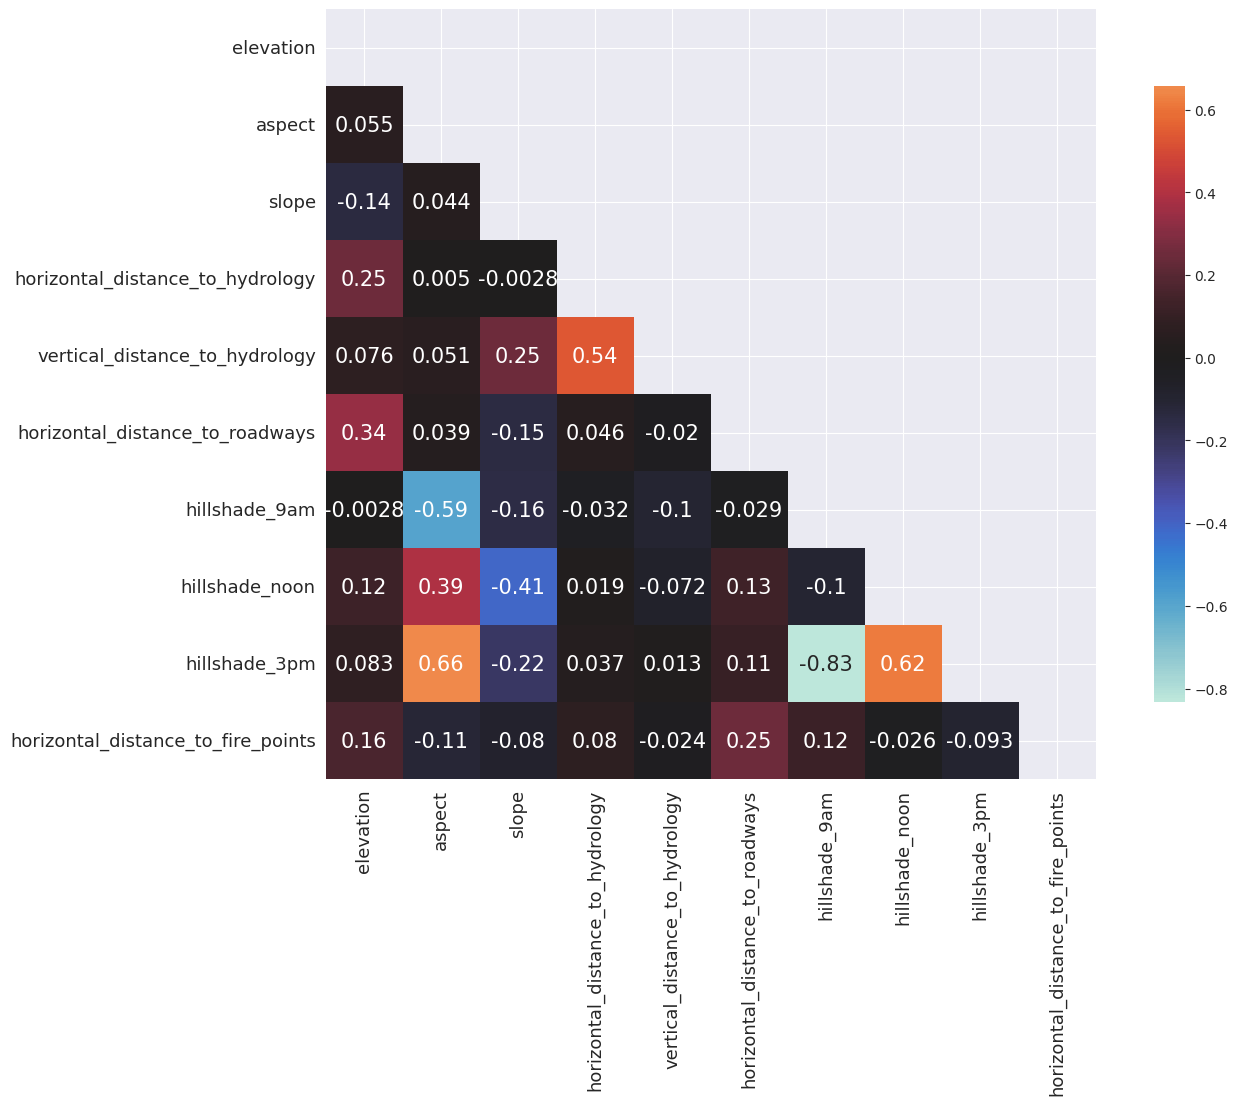

In [ ]:
plt.subplots(figsize=(15,10))

# compute correlation matrix
num_features_corr = num_features_filtered.corr()

# generate mask for upper triangle
mask = np.zeros_like(num_features_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# generate heatmap masking the upper triangle and shrink the cbar
sns.heatmap(num_features_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})
plt.xticks(size=13)
plt.yticks(size=13)

plt.show()

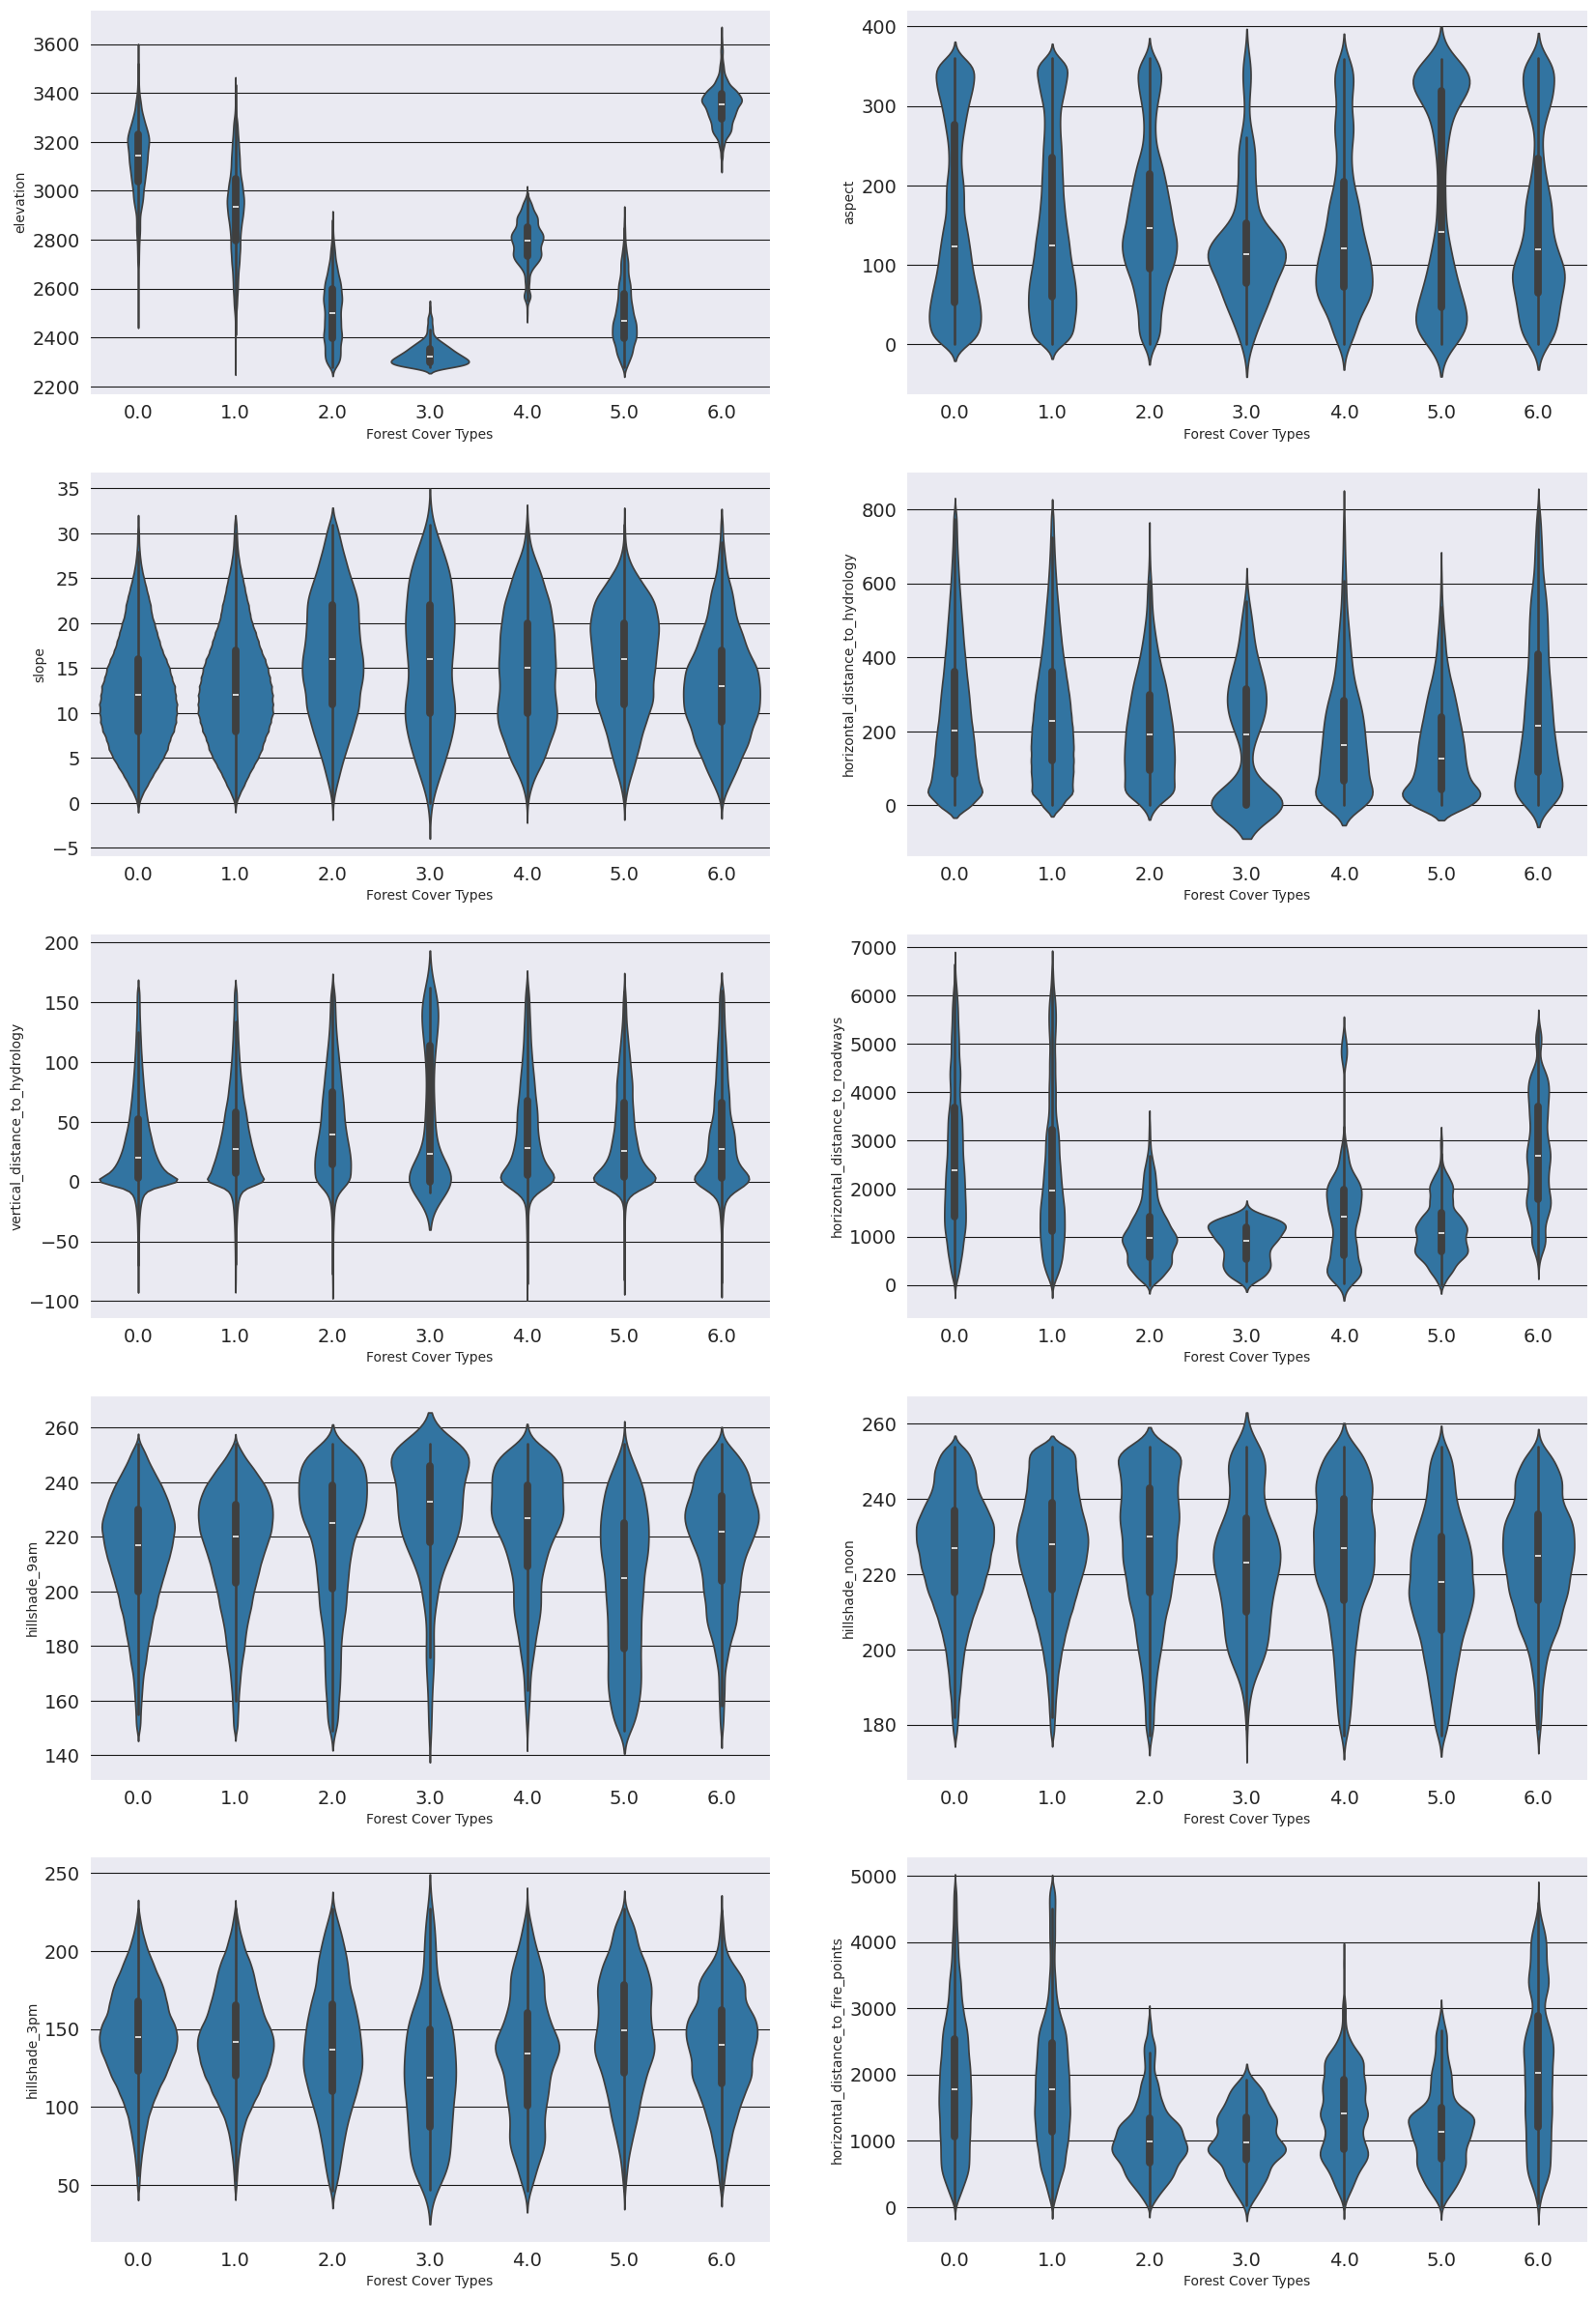

In [ ]:
# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# set target variable
target = train_filtered['cover_type']

# features to be compared with target variable
features = num_features_filtered.columns

plt.figure(figsize = [20,30])

# loop for violin plot
for i in range(0, len(features)):
    plt.subplot(5,2,1+i)
    sns.violinplot(data=num_features, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types')
    plt.ylabel(features[i])

plt.show()

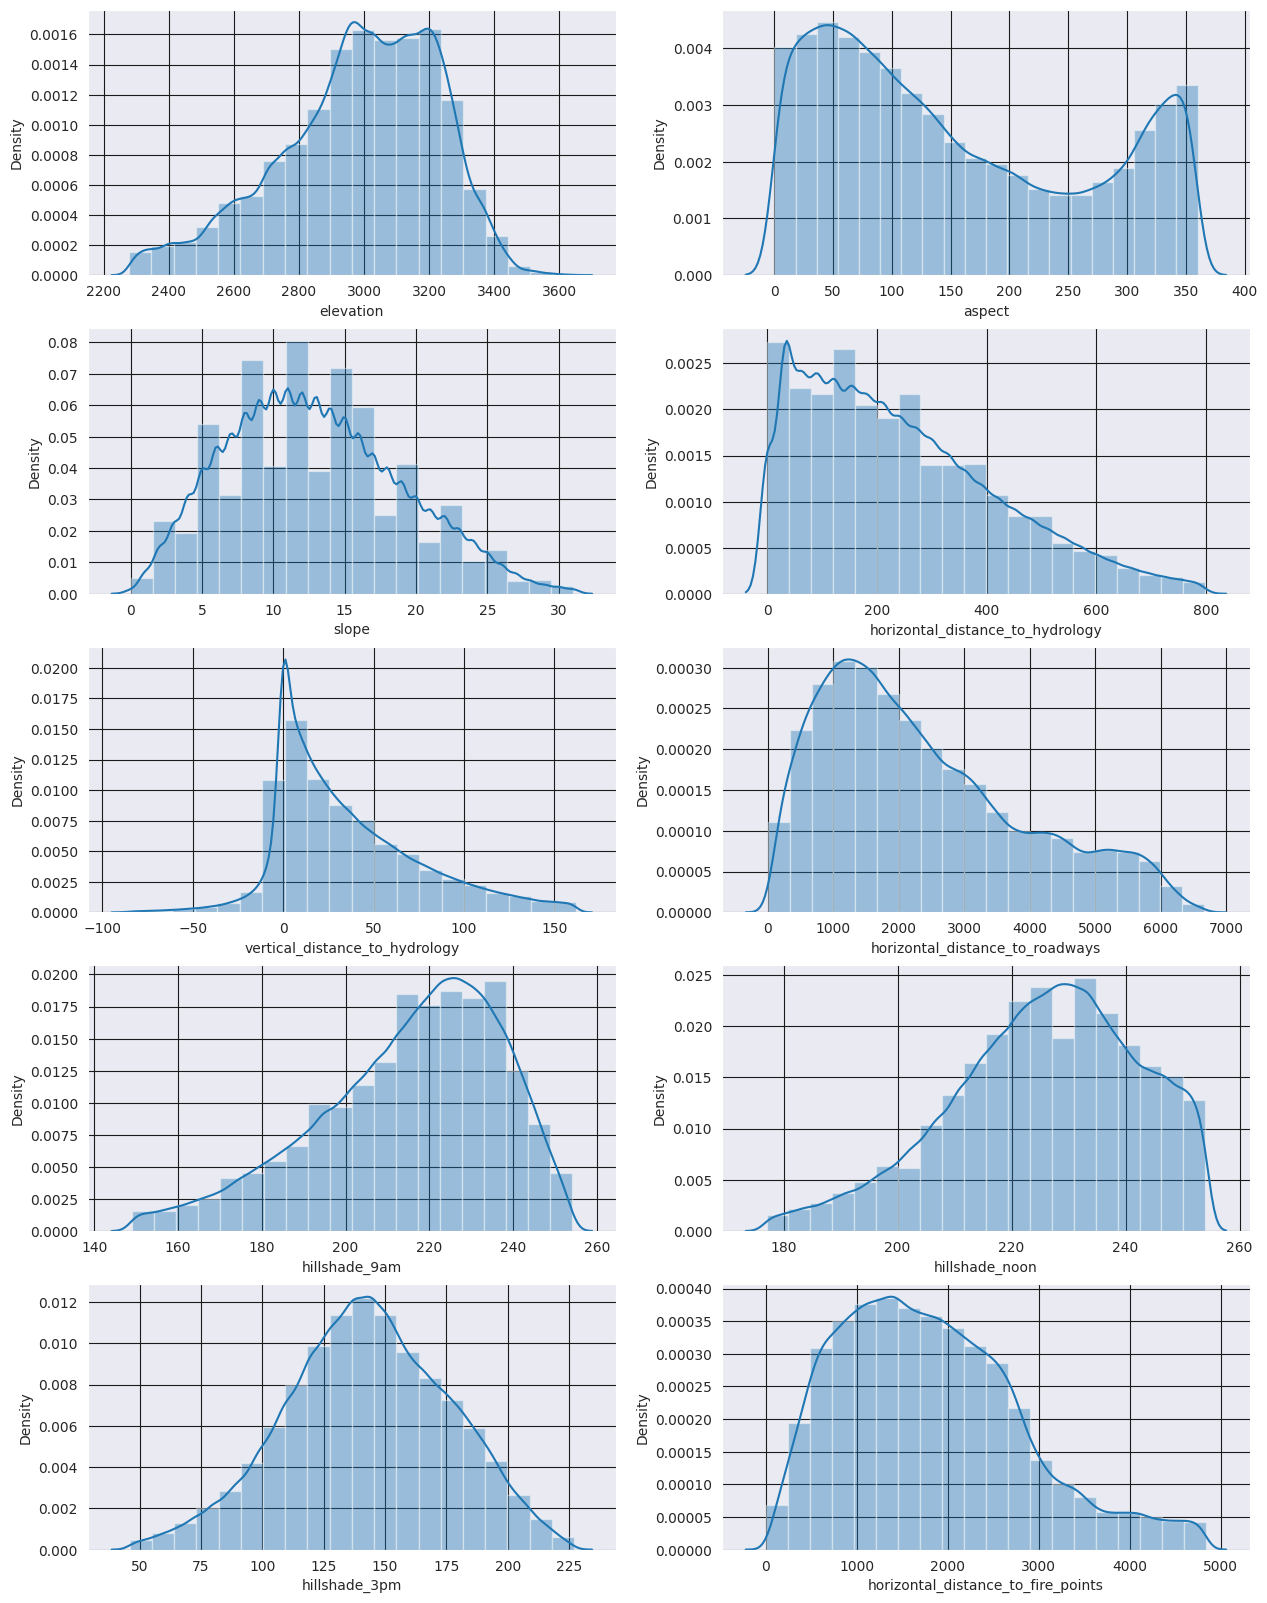

In [ ]:
fig, ax = plt.subplots(5,2, figsize=(15,20))

sns.distplot(train_filtered.elevation, bins=20, ax=ax[0,0])
sns.distplot(train_filtered.aspect, bins=20, ax=ax[0,1])
sns.distplot(train_filtered.slope, bins = 20, ax=ax[1,0])
sns.distplot(train_filtered.horizontal_distance_to_hydrology, bins = 20, ax=ax[1,1])
sns.distplot(train_filtered.vertical_distance_to_hydrology, bins = 20, ax=ax[2,0])
sns.distplot(train_filtered.horizontal_distance_to_roadways, bins = 20, ax=ax[2,1])
sns.distplot(train_filtered.hillshade_9am, bins = 20, ax=ax[3,0])
sns.distplot(train_filtered.hillshade_noon, bins = 20, ax=ax[3,1])
sns.distplot(train_filtered.hillshade_3pm, bins = 20, ax=ax[4,0])
sns.distplot(train_filtered.horizontal_distance_to_fire_points, bins = 20, ax=ax[4,1])
plt.show()